In [1]:
pip install --upgrade pyspark

In [2]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pyarrow.parquet as pq
import pyarrow as pa
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing

In [2]:
# Read customer.csv, market.csv ,and products.csv
customer_df = pd.read_csv("C:\\Users\\patir\\Desktop\\GDDA - Data Analytics\\GDDA707 Advanced Data Engineering\\Assessment_2\\customer.csv")
market_df = pd.read_csv("C:\\Users\\patir\\Desktop\\GDDA - Data Analytics\\GDDA707 Advanced Data Engineering\\Assessment_2\\market.csv")
product_df = pd.read_csv("C:\\Users\\patir\\Desktop\\GDDA - Data Analytics\\GDDA707 Advanced Data Engineering\\Assessment_2\\product.csv")

In [3]:
# First data set - Customer.csv
customer_df

,Customer_Name,Province,Region,Customer_Segment,Cust_id
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,Cust_1
1,BARRY FRENCH,NUNAVUT,NUNAVUT,CONSUMER,Cust_2
2,CLAY ROZENDAL,NUNAVUT,NUNAVUT,CORPORATE,Cust_3
3,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,Cust_4
4,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,Cust_5
...,...,...,...,...,...
1827,NICOLE BRENNAN,ALBERTA,WEST,CONSUMER,Cust_1828
1828,JASON FORTUNE,ALBERTA,WEST,CORPORATE,Cust_1829
1829,HARRY GREENE,ALBERTA,WEST,CORPORATE,Cust_1830
1830,GRANT DONATELLI,ALBERTA,WEST,CONSUMER,Cust_1831


In [4]:
# Second data set - Market.csv
market_df

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
...,...,...,...,...,...,...,...,...,...,...
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62


In [5]:
# Third data set - Product.csv
product_df

,Product_Category,Product_Sub_Category,Prod_id
0,OFFICE SUPPLIES,STORAGE & ORGANIZATION,Prod_1
1,OFFICE SUPPLIES,APPLIANCES,Prod_2
2,OFFICE SUPPLIES,BINDERS AND BINDER ACCESSORIES,Prod_3
3,TECHNOLOGY,TELEPHONES AND COMMUNICATION,Prod_4
4,FURNITURE,OFFICE FURNISHINGS,Prod_5
5,OFFICE SUPPLIES,PAPER,Prod_6
6,OFFICE SUPPLIES,RUBBER BANDS,Prod_7
7,TECHNOLOGY,COMPUTER PERIPHERALS,Prod_8
8,OFFICE SUPPLIES,ENVELOPES,Prod_9
9,FURNITURE,BOOKCASES,Prod_10


In [6]:
# Assuming 'Cust_id' is the common key, merge both DataFrames
merge_df = pd.merge(customer_df, market_df, on='Cust_id')

# Assuming 'Prod_id' is the common key, merge another DataFrame
merge_df = pd.merge(merge_df, product_df, on='Prod_id')

In [19]:
# Show data set after merge
merge_df

,Customer_Name,Province,Region,Customer_Segment,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category,TotalSales
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,261.54,0.04,6,-213.25,35.00,0.80,OFFICE SUPPLIES,STORAGE & ORGANIZATION,1604.24
1,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,370.48,0.04,28,-5.45,4.51,0.59,OFFICE SUPPLIES,STORAGE & ORGANIZATION,10377.95
2,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,905.08,0.09,22,127.70,6.22,0.52,OFFICE SUPPLIES,STORAGE & ORGANIZATION,19917.98
3,MONICA FEDERLE,NUNAVUT,NUNAVUT,CORPORATE,2781.82,0.07,21,-695.26,35.00,0.52,OFFICE SUPPLIES,STORAGE & ORGANIZATION,58453.22
4,NICOLE HANSEN,NUNAVUT,NUNAVUT,SMALL BUSINESS,3338.98,0.00,40,-846.73,35.00,0.81,OFFICE SUPPLIES,STORAGE & ORGANIZATION,133594.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,SHUI TOM,ALBERTA,WEST,HOME OFFICE,5793.46,0.01,38,2477.77,13.99,0.38,TECHNOLOGY,OFFICE MACHINES,220165.47
8395,FRANK HAWLEY,ALBERTA,WEST,HOME OFFICE,12007.05,0.09,16,2713.95,55.30,0.40,TECHNOLOGY,OFFICE MACHINES,192168.10
8396,AARON BERGMAN,ALBERTA,WEST,CORPORATE,4233.15,0.08,35,1219.87,26.30,0.38,TECHNOLOGY,OFFICE MACHINES,148186.55
8397,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,754.92,0.00,7,-129.57,19.99,0.52,TECHNOLOGY,OFFICE MACHINES,5304.43


In [8]:
# Dropped some column in my data set.
merge_df.drop(columns= ['Cust_id', 'Ord_id', 'Prod_id', 'Ship_id'], inplace = True)
merge_df

,Customer_Name,Province,Region,Customer_Segment,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Product_Category,Product_Sub_Category
0,MUHAMMED MACINTYRE,NUNAVUT,NUNAVUT,SMALL BUSINESS,261.54,0.04,6,-213.25,35.00,0.80,OFFICE SUPPLIES,STORAGE & ORGANIZATION
1,CARLOS SOLTERO,NUNAVUT,NUNAVUT,CONSUMER,370.48,0.04,28,-5.45,4.51,0.59,OFFICE SUPPLIES,STORAGE & ORGANIZATION
2,CARL JACKSON,NUNAVUT,NUNAVUT,CORPORATE,905.08,0.09,22,127.70,6.22,NaN,OFFICE SUPPLIES,STORAGE & ORGANIZATION
3,MONICA FEDERLE,NUNAVUT,NUNAVUT,CORPORATE,2781.82,0.07,21,-695.26,35.00,NaN,OFFICE SUPPLIES,STORAGE & ORGANIZATION
4,NICOLE HANSEN,NUNAVUT,NUNAVUT,SMALL BUSINESS,3338.98,0.00,40,-846.73,35.00,0.81,OFFICE SUPPLIES,STORAGE & ORGANIZATION
...,...,...,...,...,...,...,...,...,...,...,...,...
8394,SHUI TOM,ALBERTA,WEST,HOME OFFICE,5793.46,0.01,38,2477.77,13.99,0.38,TECHNOLOGY,OFFICE MACHINES
8395,FRANK HAWLEY,ALBERTA,WEST,HOME OFFICE,12007.05,0.09,16,2713.95,55.30,0.40,TECHNOLOGY,OFFICE MACHINES
8396,AARON BERGMAN,ALBERTA,WEST,CORPORATE,4233.15,0.08,35,1219.87,26.30,0.38,TECHNOLOGY,OFFICE MACHINES
8397,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,754.92,0.00,7,-129.57,19.99,0.52,TECHNOLOGY,OFFICE MACHINES


In [9]:
# Information about data set
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Name         8399 non-null   object 
 1   Province              8399 non-null   object 
 2   Region                8399 non-null   object 
 3   Customer_Segment      8399 non-null   object 
 4   Sales                 8399 non-null   float64
 5   Discount              8399 non-null   float64
 6   Order_Quantity        8399 non-null   int64  
 7   Profit                8399 non-null   float64
 8   Shipping_Cost         8399 non-null   float64
 9   Product_Base_Margin   8336 non-null   float64
 10  Product_Category      8399 non-null   object 
 11  Product_Sub_Category  8399 non-null   object 
dtypes: float64(5), int64(1), object(6)
memory usage: 787.5+ KB


In [10]:
# Cheking missing values
merge_df.isnull().sum()

Customer_Name            0
Province                 0
Region                   0
Customer_Segment         0
Sales                    0
Discount                 0
Order_Quantity           0
Profit                   0
Shipping_Cost            0
Product_Base_Margin     63
Product_Category         0
Product_Sub_Category     0
dtype: int64

In [11]:
# Display summary statistics of the dataset
print("\nSummary Statistics:")
print(merge_df.describe())


Summary Statistics:
              Sales     Discount  Order_Quantity        Profit  Shipping_Cost  \
count   8399.000000  8399.000000     8399.000000   8399.000000    8399.000000   
mean    1775.878179     0.049671       25.571735    181.184424      12.838557   
std     3585.050525     0.031823       14.481071   1196.653371      17.264052   
min        2.240000     0.000000        1.000000 -14140.700000       0.490000   
25%      143.195000     0.020000       13.000000    -83.315000       3.300000   
50%      449.420000     0.050000       26.000000     -1.500000       6.070000   
75%     1709.320000     0.080000       38.000000    162.750000      13.990000   
max    89061.050000     0.250000       50.000000  27220.690000     164.730000   

       Product_Base_Margin  
count          8336.000000  
mean              0.512513  
std               0.135589  
min               0.350000  
25%               0.380000  
50%               0.520000  
75%               0.590000  
max              

Correlation matrix:
                        Sales  Discount  Order_Quantity    Profit  \
Sales                1.000000 -0.019686        0.220582  0.581960   
Discount            -0.019686  1.000000       -0.009649 -0.037128   
Order_Quantity       0.220582 -0.009649        1.000000  0.194655   
Profit               0.581960 -0.037128        0.194655  1.000000   
Shipping_Cost        0.434578 -0.001956       -0.011457 -0.021362   
Product_Base_Margin  0.156759  0.004079        0.007839 -0.112985   

                     Shipping_Cost  Product_Base_Margin  
Sales                     0.434578             0.156759  
Discount                 -0.001956             0.004079  
Order_Quantity           -0.011457             0.007839  
Profit                   -0.021362            -0.112985  
Shipping_Cost             1.000000             0.373826  
Product_Base_Margin       0.373826             1.000000  


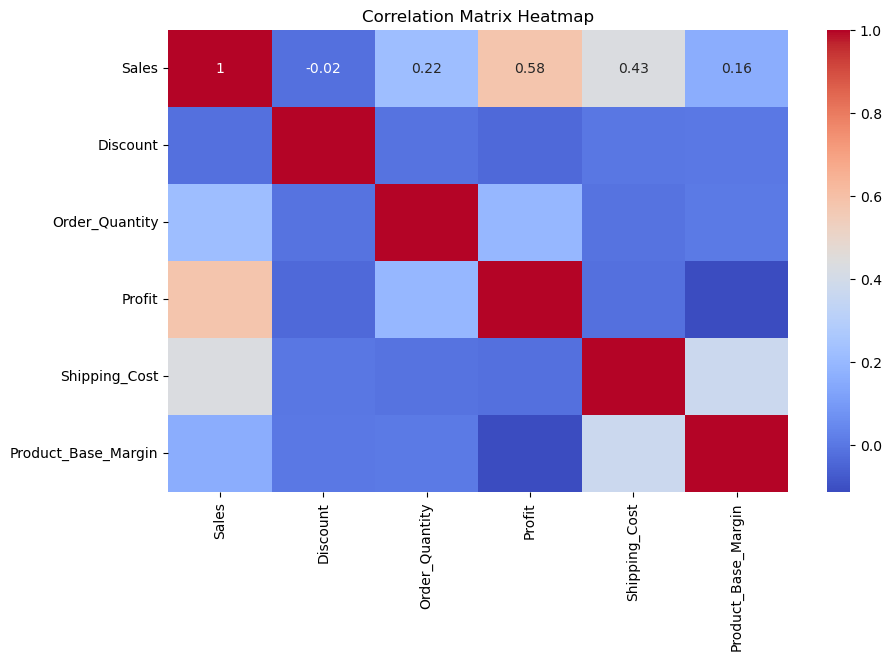

In [12]:
# Correlation Analysis
correlation_matrix = merge_df.select_dtypes(include=[np.number]).corr()
print("Correlation matrix:")
print(correlation_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
# Fill missing salaries with the median product base margin
merge_df['Product_Base_Margin'].fillna(merge_df['Product_Base_Margin'].median(), inplace=True)

In [20]:
# New colunm total sales
merge_df['TotalSales'] = merge_df['Sales'] * merge_df['Order_Quantity'] + merge_df['Shipping_Cost']
print(merge_df['TotalSales'])

0         1604.24
1        10377.95
2        19917.98
3        58453.22
4       133594.20
          ...    
8394    220165.47
8395    192168.10
8396    148186.55
8397      5304.43
8398    412932.55
Name: TotalSales, Length: 8399, dtype: float64


In [15]:
# Perform analysis: Province sold by Region
sales_by_province_region = merge_df.groupby(['Province', 'Region', ])['Sales'].sum().reset_index()
print("\nProvince sold by Region:")
print(sales_by_province_region)


Province sold by Region:
                 Province                 Region         Sales
0                 ALBERTA                   WEST  1.704791e+06
1        BRITISH COLUMBIA                   WEST  1.892758e+06
2                MANITOBA                 PRARIE  1.372849e+06
3           NEW BRUNSWICK               ATLANTIC  6.842115e+05
4            NEWFOUNDLAND               ATLANTIC  1.029241e+05
5   NORTHWEST TERRITORIES  NORTHWEST TERRITORIES  8.008473e+05
6             NOVA SCOTIA               ATLANTIC  8.177294e+05
7                 NUNAVUT                NUNAVUT  1.163765e+05
8                 ONTARIO                ONTARIO  3.063212e+06
9    PRINCE EDWARD ISLAND               ATLANTIC  4.093832e+05
10                 QUEBEC                 QUEBEC  1.510195e+06
11            SASKACHEWAN                 PRARIE  1.464456e+06
12                  YUKON                  YUKON  9.758674e+05


<Axes: ylabel='count'>

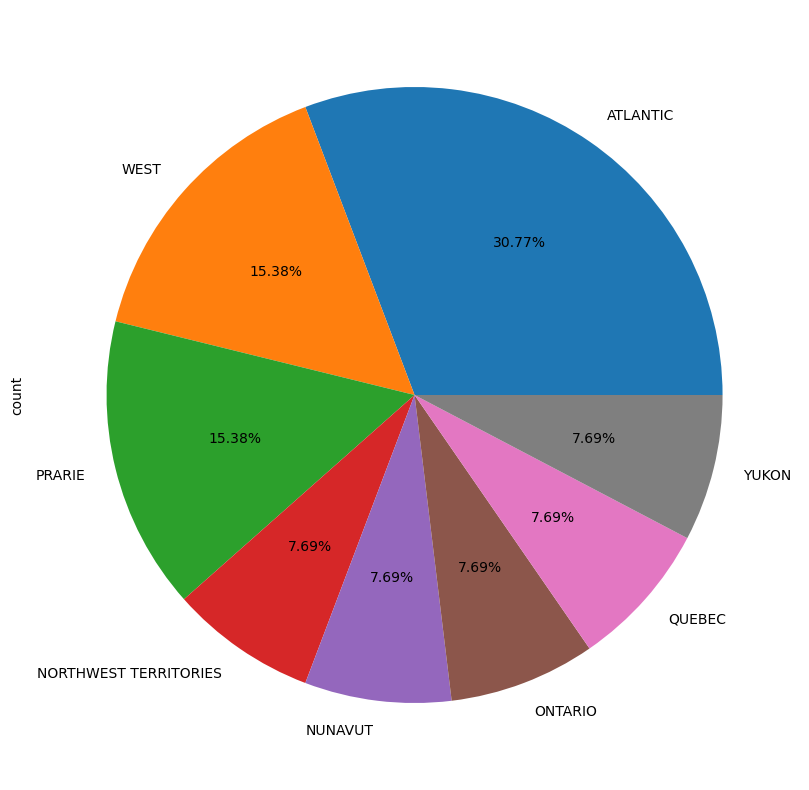

In [16]:
plt.figure(1, figsize=(10,10))
sales_by_province_region['Region'].value_counts().plot.pie(autopct="%1.2f%%")

In [17]:
# Sales by Product and Category
sales_by_category = merge_df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False)

print("\nSales by Product Category:")
print(sales_by_category)


Sales by Product Category:
Product_Category
TECHNOLOGY         5984248.182
FURNITURE          5178590.542
OFFICE SUPPLIES    3752762.100
Name: Sales, dtype: float64


In [18]:
# Calculate the mean, median, and mode of the salary column
mean_sales = merge_df['Sales'].mean()
median_sales = merge_df['Sales'].median()
mode_sales = merge_df['Sales'].mode()[0]

print(f"\nMean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")


Mean Sales: 1775.878178830813
Median Sales: 449.42
Mode Sales: 10.48


In [52]:
# Perform analysis: Product categories sold by segment
sales_by_segment_category = merge_df.groupby(['Customer_Segment', 'Product_Category', 'Product_Sub_Category'])['Sales'].sum().reset_index()
print("\nProduct categories sold by Segment:")
print(sales_by_segment_category)


Product categories sold by Segment:
   Customer_Segment Product_Category          Product_Sub_Category  \
0          CONSUMER        FURNITURE                     BOOKCASES   
1          CONSUMER        FURNITURE            CHAIRS & CHAIRMATS   
2          CONSUMER        FURNITURE            OFFICE FURNISHINGS   
3          CONSUMER        FURNITURE                        TABLES   
4          CONSUMER  OFFICE SUPPLIES                    APPLIANCES   
..              ...              ...                           ...   
63   SMALL BUSINESS  OFFICE SUPPLIES        STORAGE & ORGANIZATION   
64   SMALL BUSINESS       TECHNOLOGY          COMPUTER PERIPHERALS   
65   SMALL BUSINESS       TECHNOLOGY               COPIERS AND FAX   
66   SMALL BUSINESS       TECHNOLOGY               OFFICE MACHINES   
67   SMALL BUSINESS       TECHNOLOGY  TELEPHONES AND COMMUNICATION   

          Sales  
0   184419.7300  
1   374635.0800  
2   127840.0300  
3   441912.3740  
4   112337.4600  
..          ..

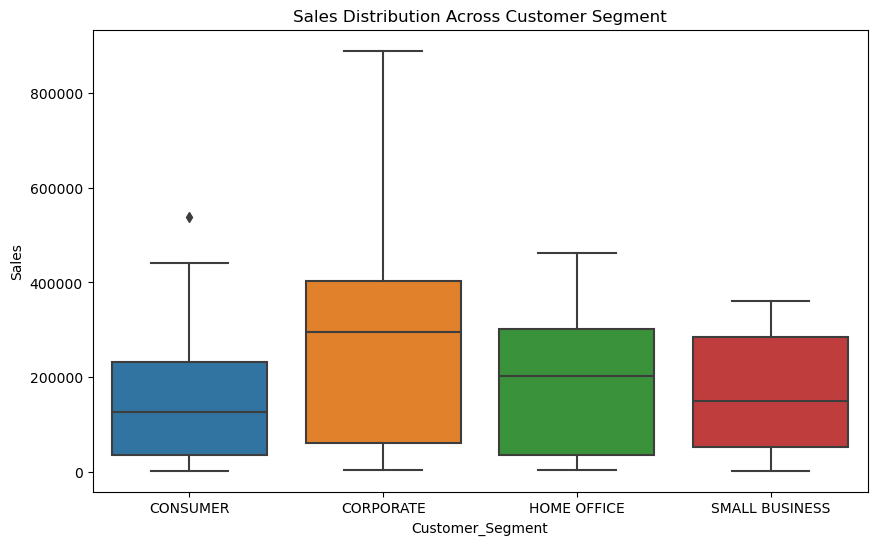

In [53]:
# Box plot of salary distribution across departments
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_by_segment_category, x='Customer_Segment', y='Sales')
plt.title('Sales Distribution Across Customer Segment')
plt.show()

In [54]:
#highest_avg_sales
highest_avg_sales_segm = sales_by_segment_category.groupby('Customer_Segment')['Sales'].mean().idxmax()
print(f"\nDepartment with the highest average sales: {highest_avg_sales_segm}")


Department with the highest average sales: CORPORATE


<Axes: xlabel='Product_Category', ylabel='Sales'>

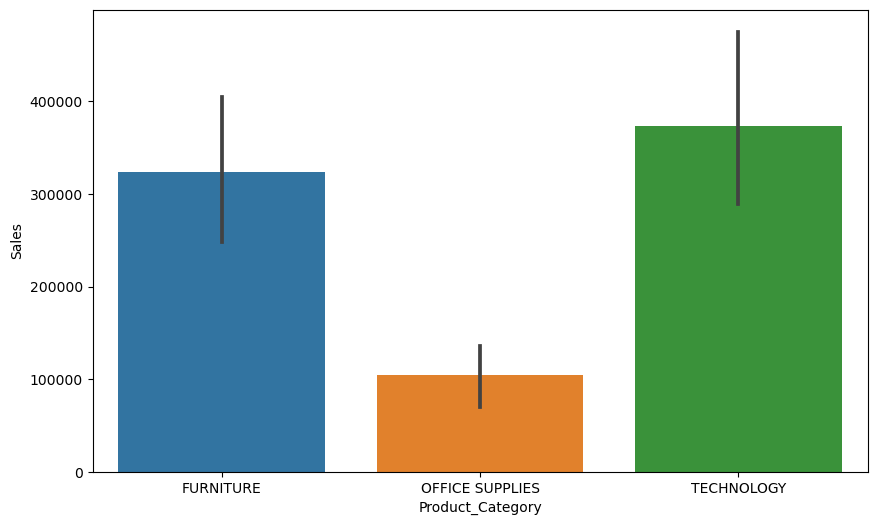

In [55]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Product_Category', y = 'Sales', data = sales_by_segment_category)

In [56]:
#highest_avg_sales_product_category
highest_avg_product_category = sales_by_segment_category.groupby('Product_Category')['Sales'].mean().idxmax()
print(f"\nProduct Category with the highest average sales: {highest_avg_product_category}")


Product Category with the highest average sales: TECHNOLOGY


In [57]:
#  Group by Product Category and Sales - Mean shipping cost
product_category_shipping = merge_df.groupby(['Product_Category', 'Sales'])['Shipping_Cost'].mean().reset_index()
print(f"\nProduct Category with the highest mean shipping cost: {product_category_shipping}")


Product Category with the highest mean shipping cost:      Product_Category     Sales  Shipping_Cost
0           FURNITURE      7.15           2.03
1           FURNITURE      8.48           3.63
2           FURNITURE     11.01           5.33
3           FURNITURE     11.08           4.08
4           FURNITURE     11.64           4.00
...               ...       ...            ...
8222       TECHNOLOGY  29884.60          24.49
8223       TECHNOLOGY  33367.85          24.49
8224       TECHNOLOGY  41343.21          24.49
8225       TECHNOLOGY  45923.76          24.49
8226       TECHNOLOGY  89061.05          24.49

[8227 rows x 3 columns]


Mean Squared Error: 6717271.798795779
R-squared: 0.6027766219372794


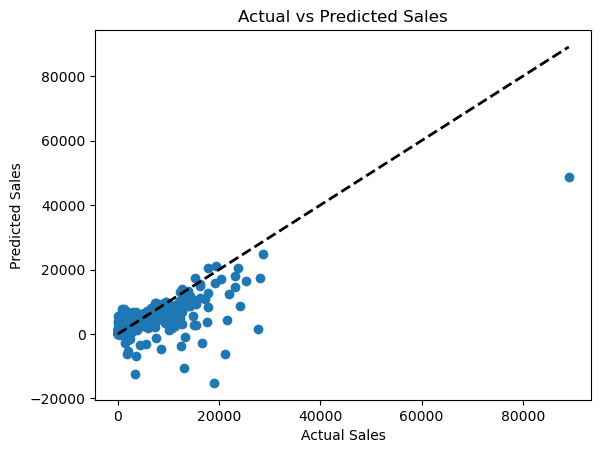

In [58]:
# Define features (X) and target variable (y)
X = merge_df[[ 'Profit', 'Shipping_Cost', 'Product_Base_Margin']]
y = merge_df[['Sales']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error adn
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Plot the best fit line
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Plot the diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

<Axes: xlabel='Shipping_Cost', ylabel='Count'>

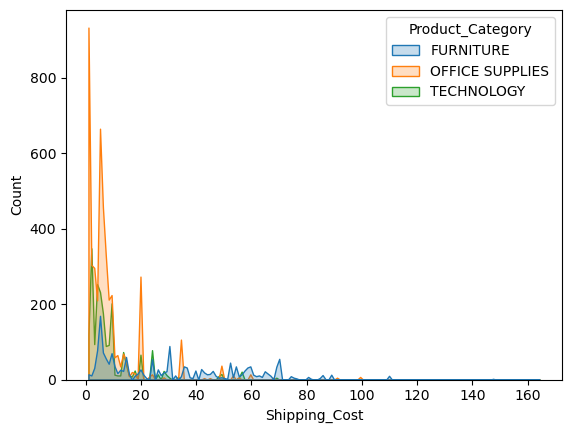

In [59]:
sns.histplot(product_category_shipping, x="Shipping_Cost", hue="Product_Category", element="poly")

In [34]:
# Save the online shopping DataFrame to a Parquet file
shopping_online_parquet_file = 'online_shopping.parquet'
pq.write_table(pa.Table.from_pandas(merge_df), shopping_online_parquet_file)
print(f"Online Shopping saved to {shopping_online_parquet_file}")

Online Shopping saved to online_shopping.parquet
